## DPEE 1072
### Boost in DCM
#### Prof. Humberto Pinheiro,Ph.D.

In [1]:
import numpy as np
from numpy import pi
from scipy import sqrt, exp, cos, matrix, vstack, hstack, zeros
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
import mpld3
import math as m
import cmath
import sympy as sp
sp.init_printing()

Input Data

In [2]:
Prated=200
E1=200
E2=400   
fsw=100000
T=1/fsw
print ( ' fsw=', fsw/1000,'kHz')
print ( ' T=', T*10**6,'us')

 fsw= 100.0 kHz
 T= 10.0 us


In DCM usually the switching frequency is constant and the duty cycle $d$ is the control variable

Text(0.5,1,'MOSFET gate source voltage')

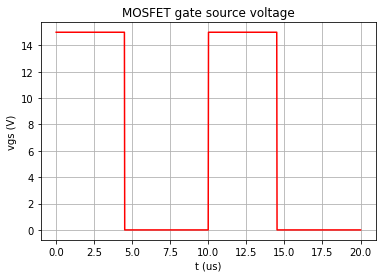

In [3]:
d=0.45
t1=np.linspace(0,2*T,1000)
ts1=t1<d*T
ts2=(t1>=d*T)*(t1<T)
ts3=(t1>T)*(t1<(d*T+T))
ts4=(t1>T)*(t1>(d*T+T))
vag=1*ts1+0*ts2+1*ts3+0*ts4
mpld3.enable_notebook()
plt.grid()
plt.plot(t1*10**6,15*vag,'r')
plt.xlabel('t (us)')
plt.ylabel('vgs (V)' )
plt.title('MOSFET gate source voltage')



![Buck Boost in DCM](img/boost_000.png)

The boost converter operating in Discountinouos Conduction Mode has three stages that are described below.

Note that in DCM $i_L(0)=0$.

## Stage 1
This stage is lasts for $ 0<t < dT$, and the equivalente circuit is:
![Boost in DCM](img/boost_stage1.png)

In this stage $ v_{gs}=15V$ and the MOSFET is on.
From the KVL one has:

${v_L} = L\frac{{di_L}}{{dt}} = {E_1}$           

since

${i_L}(0) = 0 $ 

By soving the diferential equation results:


${i_L}(t) = \frac{E_1}{L}t{\rm{ }}$

for any $0 \le t \le dT$.

At the end of this stage when $t=dT$ the inductor current is at its peak, that is:

${i_L}(dT) =  \frac{{{E_1}}}{L}dT{\rm{ }}$

Let us name the peak value of the inductor current $I_{peak}$, therefore

${i_L}(dT)={I_{peak}} =  \frac{{{E_1}}}{L}dT{\rm{ }}$


In addtion the voltage across the diode is:

$v_{ak}=-E_2$









## Stage 2
This stage is lasts for $ dT<t < t_1$, and the equivalente circuit is:
![Boost in DCM](img/boost_dcm_stage2.png)

Note that in DCM $i_L(dT)=I_{peak}$.

In this stage $ v_{gs}=0V$ and the MOSFET is off.
From the KVL one has:

${v_L} = L\frac{{di_L}}{{dt}} = {E_1}-E_2$ ,          

since $i_L(dT)=I_{peak}$,by soving the diferential equation results:


${i_L}(t) = I_{peak}+\frac{E_1-E_2}{L}(t-dT){\rm{ }}$

for any $dT \le t \le t_1$. 

Now, to find the instant that the diode current reaches zero it is possible to solve the following equation for $t$


$0 = {\left. {{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t-dT)} \right|_{t = {t_1}}}$,

that is 

${t_1} = \frac{{{I_{peak}}L}}{{{E_2} - {E_1}}} + dT$

or

${t_1} = \frac{{\frac{{{E_1}dT}}{L}L}}{{{E_2} - {E_1}}} + dT = (\frac{{{E_1}}}{{{E_2} - {E_1}}} + 1)dT = \frac{{{E_2}dT}}{{{E_2} - {E_1}}}$

For operation in DCM the current $i_L$ must reach zero before the end of the period, $T$, therefore

${t_1} < T$.

which results

$d < \frac{{{E_2} - {E_1}}}{{{E_2}}}$ .

Finally, the voltage across the MOSFET is

$ v_{DS}=E_2$





## Stage 3
This stage is lasts for $ t_1<t < T$, and the equivalente circuit is:
![Boost in DCM](img/boost_dcm_stage3.png)

Note that in DCM $i_L(t)=0$ for all $t$ during this stage. In addtion, from the equivalente circuit, using the KVL and noting that $v_L$, it is easy to conclude that:
$$v_{DS}=E_1$$
$$v_{ak}=E_1-E_2$$


The inductor current can be expressed as:

# Desiging 

Let us start by defining the current through the inductor

${i_L}(t) = \left\{ {\begin{array}{*{20}{c}}
{\frac{{{E_1}}}{L}t}&\forall &{0 < t \le dT}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - dT)}&\forall &{dT < t \le {t_1}}\\
0&\forall &{{t_1} < t \le T}
\end{array}} \right.$

where

${I_{peak}} = \frac{{{E_1}dT}}{L}$

and

${t_1} = \frac{{{E_2}dT}}{{{E_2} - {E_1}}}$.


Therefore, the average on the boost inductor computed over of switchimg period:

${I_{L\_av}} = \frac{1}{T}\int_0^T {{i_L}(t)dt}$

${I_{L\_av}} = \frac{{{E_1}{E_2}{d^2}T}}{{2L({E_2} - {E_1})}}$

which leads to

$L = \frac{{{E_1}{E_2}{d^2}T}}{{2{I_{L\_av}}({E_2} - {E_1})}}$.

For the design we can replace $I_{Lav}=\frac{P_{rated}}{E_1}$, $d$ by $d_{max}$ which results

$L \le \frac{{{E_1}^2{E_2}d_{\max }^2T}}{{2{P_{rated}}({E_2} - {E_1})}}$

## Example

In [4]:
dmax=(E2-E1)/E2
print('dmax=',dmax)

dmax= 0.5


Selected duty cyle

In [5]:
d=0.45

 Inductance value

In [6]:
L=E1**2*E2*d**2*T/(2*Prated*(E2-E1))
print( 'L=',L*10**6,'uH')

L= 405.0000000000001 uH


RMS Current on the MOSFET
Let us star from the MOSFET current as a function of time

${i_{MOSFET}}(t) = \left\{ {\begin{array}{*{20}{c}}
{\frac{{{E_1}}}{L}t}&\forall &{0 < t \le dT}\\
0&\forall &{dT < t \le T}
\end{array}} \right.$

The MOSFET rms current is:

${I_{MOSFET\_rms}} = \sqrt {\frac{1}{T}\int_0^T {{i_{MOSFET}}{{(t)}^2}dt} }  $

In [7]:
t=sp.symbols('t')
Irms=sp.sqrt(1/T*sp.integrate( (E1*t/L)**2,(t,0,d*T)))
print('Irms_MOSFET=',Irms,'A')
Rdson=0.85
Pcond_MOSFET=Rdson*Irms**2
print('Pcond_MOSFET=',Pcond_MOSFET,'W')

Irms_MOSFET= 0.860662965823870 A
Pcond_MOSFET= 0.629629629629629 W


Average and RMS current on the diode

${i_{DIDO}}(t) = \left\{ {\begin{array}{*{20}{c}}
0&\forall &{0 < t \le dT}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - dT)}&\forall &{dT < t \le {t_1}}\\
0&\forall &{{t_1} < t \le T}
\end{array}} \right.$


$\begin{array}{l}
{I_{DIODE\_rms}} = \sqrt {\frac{1}{T}\int_0^T {{i_{DIODE}}{{(t)}^2}dt} } \\
\\
{I_{DIODE\_av}} = \frac{1}{T}\int_0^T {{i_{DIODE}}(t)dt} 
\end{array}$

In [23]:
Ipeak=E1*d*T/L
print('Ipeak=',Ipeak,'A')
t1=E2*d*T/(E2-E1)
print('t1=',t1*10**6,'us')
t=sp.symbols('t')
Irms_diode=sp.sqrt( 1/T*sp.integrate( (Ipeak+(E1-E2)/L*(t-d*T))**2,(t,d*T,t1) ) )
print('Irms_diode=',Irms_diode,'A')
Iav_diode=1/T*sp.integrate( (Ipeak+(E1-E2)*(t-d*T)/L),(t,d*T,t1))
print('Iav_diode=',Iav_diode,'A')
rf=0.167
vf=0.45
Pcond_diode=rf*Irms_diode**2+vf*Iav_diode
print('Pcond_DIODE=',Pcond_diode,'W')


Ipeak= 2.222222222222222 A
t1= 9.0 us
Irms_diode= 0.860662965823869 A
Iav_diode= 0.500000000000000 A
Pcond_DIODE= 0.348703703703703 W


##  Quantities for the inductor design
${i_L}(t) = \left\{ {\begin{array}{*{20}{c}}
{\frac{{{E_1}}}{L}t}&\forall &{0 < t \le dT}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - dT)}&\forall &{dT < t \le {t_1}}\\
0&\forall &{{t_1} < t \le T}
\end{array}} \right.$

Therefore the peak value of the inductor current is:

${I_{Lpeak}} = \frac{{{E_1}dT}}{L}$

The RMS value of the inductor current is:

In [9]:
iL1=(E1*t/L)
iL2=Ipeak+(E1-E2)/L*(t-d*T)
Irms_inductor=sp.sqrt(1/T*(sp.integrate(iL1**2,(t,0,d*T))+sp.integrate(iL2**2,(t,d*T,t1))))
print('RMS value of the inductor current =',Irms_inductor,'A')

RMS value of the inductor current = 1.21716123890037 A


In [10]:
ILav=E1*E2*d**2*T/(2*L*(E2-E1))
print('ILav=',ILav,'A')
Ipeak=E1*d*T/L
print('Ipeak=',Ipeak,'A')

ILav= 1.0 A
Ipeak= 2.222222222222222 A


### Output Capacitance
#### 1) The maximum allowed output voltage ripple is usually given
#### 2) In DC Steady State the dc component of the current trough the capacitor is zero
#### 3) The Capacitance can be defined form the capacitor current waveform

### Frequency domain approach
##### For a given frequency componant of current through the capacitor the corresponding voltage is found as
$${V_{ac}} =  - j{X_c}{I_{ac}}$$
#### and their magnitude can be expressed as
$$\left| {{V_{ac}}} \right| = {X_c}\left| {{I_{ac}}} \right|$$
#### where
$${X_c} = \frac{1}{{2\pi fC}}$$
#### and $f$ is the frenquency of the consired frequency component


## Example 1

In [11]:
C=10*10**-6
print( 'C=',C*10**6, 'uF')

C= 10.0 uF


then

In [12]:
Xc=1/(2*pi*fsw*C)
print ( 'Xc=',Xc, 'ohms')

Xc= 0.15915494309189537 ohms


From the simulation it is possible to find the amplitude of the current component @fsw through the capacitor

In [13]:
Iac=0.8
print( 'Iac=',Iac,'A @',fsw/1000,'kHz')

Iac= 0.8 A @ 100.0 kHz


Then the peak to peak ac component of the capacitor voltage is: 

In [14]:
Vca_p2p=Xc*Iac*2
print ( 'Vca_p2p=',Vca_p2p,'V @',fsw/1000,'kHz')

Vca_p2p= 0.2546479089470326 V @ 100.0 kHz


The voltage ripple as a percetage of the output dc component is

In [15]:
Ripple=Vca_p2p/E2*100
print ( 'The peak to peak voltage ripple =', Ripple,'%')

The peak to peak voltage ripple = 0.06366197723675815 %


## Example 2

Let us consider in the above example that the maximum allowed ripple is 

In [16]:
Ripple=1
print ( 'Maximum allowed output capacitor voltage ripple =',Ripple,'%')

Maximum allowed output capacitor voltage ripple = 1 %


In [17]:
Vca_p2p=Ripple/100*E2
print ( 'Maximum allowed output capacitor voltage ripple =',Vca_p2p,'V peak to peak')

Maximum allowed output capacitor voltage ripple = 4.0 V peak to peak


From the simulation, file buck_dcm_0.psimsch, it is possible to find that capacitor current component at fsw using the FFT fuction, that is:


In [18]:
Iac=0.8

Therefore

In [19]:
Xc=Vca_p2p/(2*Iac)
print ( 'Xc=',Xc, 'ohms')

Xc= 2.5 ohms


In [20]:
C=1/(2*pi*fsw*Xc)
print ( ' C=', C*10**6, 'uF')

 C= 0.6366197723675814 uF


### Lets us find the amplitude of the output voltage ripple peak to peak  in time domain

${v_c} = C\frac{{d{i_c}}}{{dt}}$
or
${v_c}(t) = {v_c}({t_o}) + \int_{{t_o}}^t {{i_c}(t)dt}$

The capacitor current, in steady state, can be found from KCL as:

${i_c}(t) = i_{DIODE}(t) - I_{av}={i_{DIODE}}(t) - \frac{{{P_{rated}}}}{{{E_2}}}$

or

${i_c}(t) = \left\{ {\begin{array}{*{20}{c}}
{ - {I_{av}}}&\forall &{0 < t \le dT}\\
{{I_{peak}} + \frac{{{E_1} - {E_2}}}{L}(t - dT) - {I_{av}}}&\forall &{dT < t \le {t_1}}\\
{ - {I_{av}}}&\forall &{{t_1} < t \le T}
\end{array}} \right.$


![Output capacitor current and voltage -boost in DCM](img/IC_BOOST_DCM1.png)



At $t=dT$ the capacitor current transiton from negative to positive 
and let $t_2$ be the time instant when the capaticor current transition from positive to nevative within the periot T

$$\begin{array}{l}
{v_c}({t_2}) - {v_c}({dT}) = \Delta V = C\int_{{dT}}^{{t_2}} {{i_c}(t)dt} \\
\Delta Q = \int_{{dT}}^{{t_2}} {{i_c}(t)dt} \\
\Delta Q = C\Delta V
\end{array}$$

First let us find $t_2$ by soving the equation that governs the capcitor current during the second stage, that is:
$$ { I_{peak}} + \frac{{({E_1} - {E_2})}}{L}(t_2-dT)- {I_{av}}=0$$



In [21]:
Iav=Prated/E2
t2=(Ipeak-Iav)*L/(E2-E1)+d*T
print( 't2=',t2*10**6 ,'us')
iac2=Ipeak+(E1-E2)/L*(t-d*T)-Iav
iac2

t2= 7.987500000000001 us


In [22]:

Delta_Q=sp.integrate(iac2,(t,d*T,t2))
Delta_V=Delta_Q/C
print ( 'Ripple peak to peak =',Delta_V,'V')
print ( 'Ripple =',Delta_V/E2*100,'%')

Ripple peak to peak = 4.71729771890592 V
Ripple = 1.17932442972648 %
